In [1]:
# Loading libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf

In [2]:
# Loading datasets
train = pd.read_csv('ncaa_train.csv')
test = pd.read_csv('ncaa_test.csv')
np.warnings.filterwarnings('ignore')

(0.0007, 15)

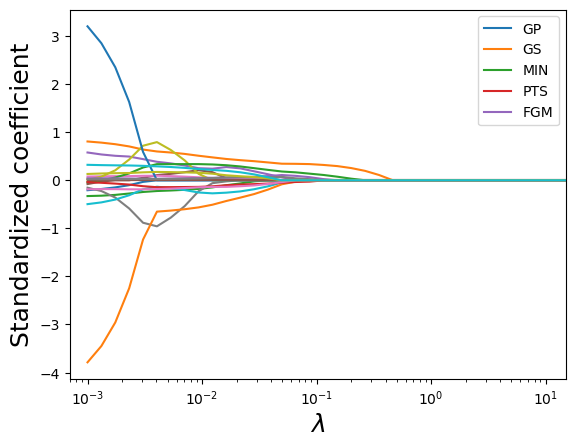

In [28]:
# Taking the log transform of NBA PTS as house prices have a right-skewed distribution
y = np.log(train.NBA_PTS)

# Standardizing predictors so that each of them have zero mean and unit variance
# Filtering all predictors
X = train.iloc[:,1:21];

# Defining a scaler object
scaler = StandardScaler()

# The scaler object will contain the mean and variance of each column (predictor) of X. 
# These values will be useful to scale test data based on the same mean and variance as obtained on train data
scaler.fit(X)

# Using the scaler object (or the values of mean and variance stored in it) to standardize X (or train data)
Xstd = scaler.transform(X)

# Test dataset
Xtest = test.iloc[:,1:21]

# Standardizing test data
Xtest_std = scaler.transform(Xtest)

# Creating a range of values of the tuning parameter to visualize the lasso coefficients for different values of the tuning parameter
alphas = 10**np.linspace(10,-2,100)*0.1

# Finding the lasso coefficients for increasing values of the tuning parameter
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(Xstd, y)
    coefs.append(lasso.coef_)

# Visualizing the shrinkage in lasso coefficients with increasing values of the tuning parameter lambda
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
plt.legend(train.columns[1:6]);
#plt.plot([lassocv.alpha_,lassocv.alpha_],[-0.4,0.25],':')
plt.legend(train.columns[1:6]);
plt.xlim([0.0007, 15])

In [4]:
# Let us use cross validation to find the optimal value of the tuning parameter - lambda
# For the optimal lambda, the cross validation error will be the least

# Note that we are reducing the range of alpha so as to better visualize the minimum
alphas = 10**np.linspace(-1,-5,200)*0.5
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000)
lassocv.fit(Xstd, y)

# Optimal value of the tuning parameter - lamda
lassocv.alpha_

0.05

Text(0, 0.5, 'Cross-validation error')

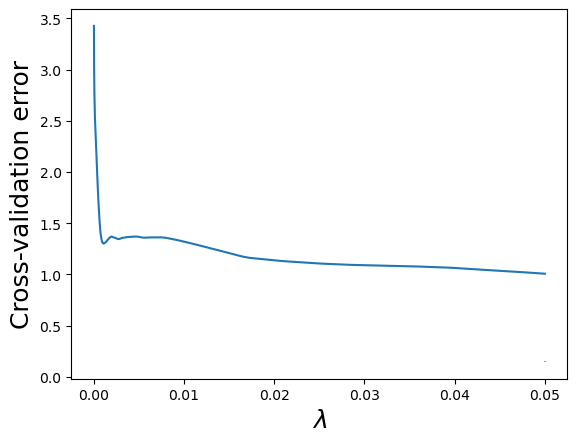

In [5]:
#Visualizing the LOOCV (leave one out cross validatation error vs lambda)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(lassocv.alphas_,lassocv.mse_path_.mean(axis=1))
plt.plot([lassocv.alpha_,lassocv.alpha_],[0.145,0.151],':')
plt.xlabel('$\lambda$')
plt.ylabel('Cross-validation error')

In [6]:
# Using the developed lasso model to predict on test data
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(Xstd, y)
pred=lasso.predict(Xtest_std)

# RMSE on test data
np.sqrt(((np.exp(pred)-test.NBA_PTS)**2).mean())

5.452917261355154

In [7]:
# R-squared on train data for the lasso model
print(r2_score(lasso.predict(Xstd),y))

# R-squared on test data for the lasso model
print(r2_score(pred,np.log(test.NBA_PTS)))

print("As seen from these both negative R-squared values, we can deduce the fact that the model is over-parametrized." )

-0.7944135152559204
-2.2810502161977286
As seen from these both negative R-squared values, we can deduce the fact that the model is over-parametrized.


In [8]:
# The lasso has a much lower RMSE on test data as compared to Ordinary least squares (OLS) regression.
# Shrinking the coefficients has improved the model fit and these following variables have been eliminated by the lasso.

array1 = np.where(lasso.coef_ == 0)[0]

for values in array1:
    print(test.columns[values])

Player
GS
MIN
FGM
FGP
Three_Pmade
Three_PP
DEF
STL
BLK
